## Credit card fraud assessment

### Installing dependencies

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


### Accessing dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Analysis

In [3]:
print(df.shape)
df.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [6]:
df["class"].value_counts()

0    284315
1       492
Name: class, dtype: int64

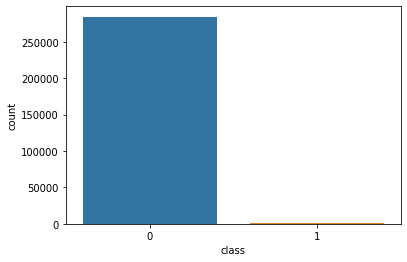

In [7]:
sns.countplot(x='class', data=df)

<Figure size 1440x720 with 0 Axes>

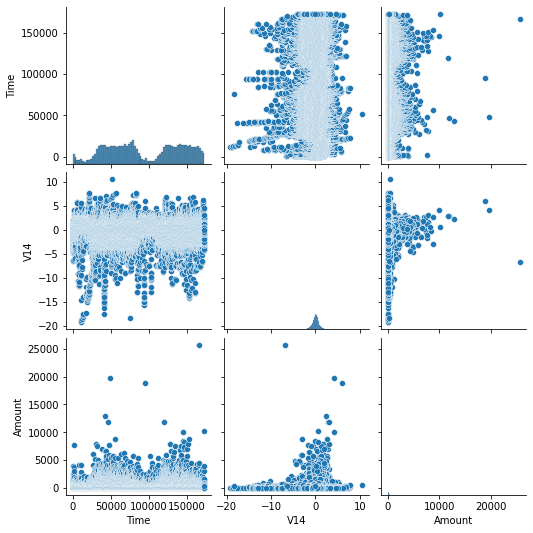

In [10]:
plt.figure(figsize=(20,10))
sns.pairplot(df[["Time","V14", "Amount"]]) # run again multiple vectors

### Rerun the below scatterplot after computing feature importance from XGBoost Model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


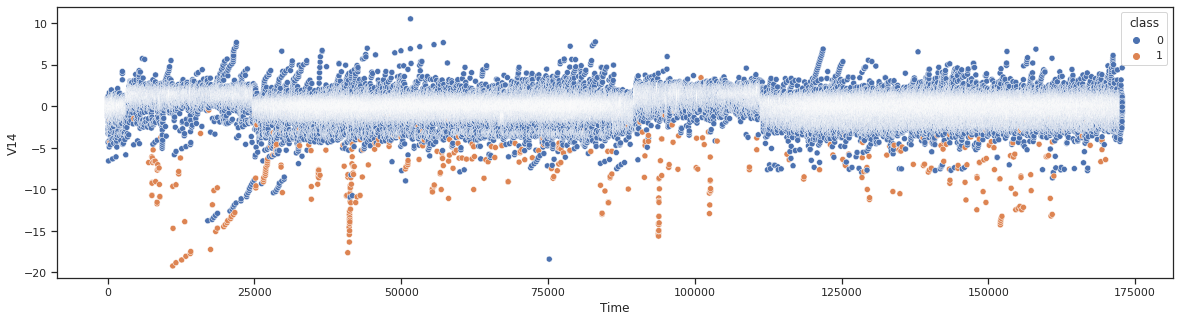

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(df["Time"], df["V14"], hue=df["class"])

In [ ]:
to_plot = df[["Amount", "Time", "V1", "V2", "V3", "V4", "class"]]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


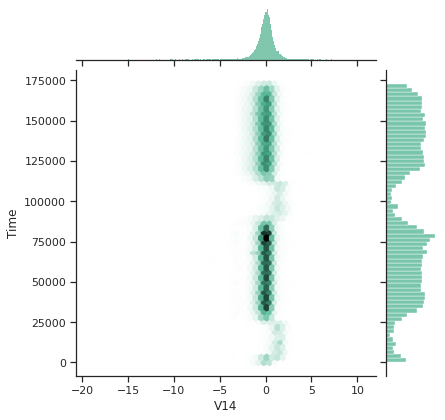

In [11]:
sns.set_theme(style="ticks")

sns.jointplot(df["V14"], df["Time"], kind="hex", color="#4CB391")

## Model Construction:
1. XGBoost
2. ANN
3. LSTM
4. SVM
5. Random Forest

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:, :-1]
y = df["class"].values.ravel()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=7)

# 1. XGBoost Model

In [14]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.93      0.79      0.85       126

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



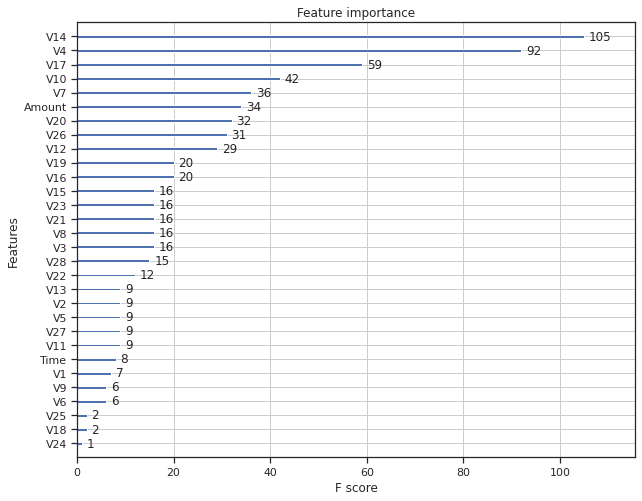

In [16]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax)

# 2. Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.93      0.80      0.86       126

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



### ANN Model

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential(
 [
 keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[-1],)),
 keras.layers.Dense(128, activation="relu"),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(256, activation="relu"),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(1, activation="sigmoid"),
 ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 38,497
Trainable params: 38,497
Non-traina

In [ ]:
model.compile(
 optimizer=keras.optimizers.Adam(1e-2), 
 loss="binary_crossentropy", 
 metrics=["accuracy"]
)

In [ ]:
history = model.fit(
 X_train,
 y_train,
 batch_size=2048,
 epochs=30,
 verbose=2,
 validation_split = 0.2)

Epoch 1/30
84/84 - 5s - loss: 52.2319 - accuracy: 0.9934 - val_loss: 0.0283 - val_accuracy: 0.9986 - 5s/epoch - 57ms/step
Epoch 2/30
84/84 - 0s - loss: 0.2766 - accuracy: 0.9945 - val_loss: 0.0232 - val_accuracy: 0.9986 - 320ms/epoch - 4ms/step
Epoch 3/30
84/84 - 0s - loss: 0.1568 - accuracy: 0.9964 - val_loss: 0.0295 - val_accuracy: 0.9986 - 335ms/epoch - 4ms/step
Epoch 4/30
84/84 - 0s - loss: 0.0720 - accuracy: 0.9982 - val_loss: 0.0322 - val_accuracy: 0.9986 - 311ms/epoch - 4ms/step
Epoch 5/30
84/84 - 0s - loss: 0.0558 - accuracy: 0.9979 - val_loss: 0.0151 - val_accuracy: 0.9986 - 335ms/epoch - 4ms/step
Epoch 6/30
84/84 - 0s - loss: 0.0451 - accuracy: 0.9982 - val_loss: 0.0149 - val_accuracy: 0.9986 - 312ms/epoch - 4ms/step
Epoch 7/30
84/84 - 0s - loss: 0.0387 - accuracy: 0.9981 - val_loss: 0.0132 - val_accuracy: 0.9986 - 306ms/epoch - 4ms/step
Epoch 8/30
84/84 - 0s - loss: 0.0299 - accuracy: 0.9982 - val_loss: 0.0135 - val_accuracy: 0.9986 - 313ms/epoch - 4ms/step
Epoch 9/30
84/84 

# LSTM - Autoencoder classifier for rare events

In [ ]:
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Input, Model
from keras.layers import Dense, LSTM
from keras.layers import RepeatVector, TimeDistributed
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, auc, roc_curve
np.random.seed(13)

In [ ]:
print("class counts:\n", df["class"].value_counts())
print("\n%% of positive values in data: %.2f%%" % 
       ((df[df["class"] == 1].shape[0] / df.shape[0]) * 100))

class counts:
 0    284315
1       492
Name: class, dtype: int64

% of positive values in data: 0.17%


In [ ]:
predictors = df.drop(["class"], axis = 1)
target = df["class"]

In [ ]:
df["class"].value_counts()

0    284315
1       369
Name: class, dtype: int64

In [ ]:
target

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: class, Length: 284807, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    predictors, target, 
    stratify = target, 
    random_state = 2, 
    test_size = 0.25)

### Training the autoencoder only on the false cases, creating our "mould"

In [ ]:
X_val = X_test[:3000]
y_val = y_test[:3000]
X_test = X_test[3000:]
y_test = y_test[3000:]
X_train_0 = X_train[y_train != 1]
y_train_0 = y_train[y_train != 1]
X_test_0 = X_test[y_test != 1]
X_val_0 = X_val[y_val != 1]
y_train_0 = y_train[y_train != 1]

### LSTM's expect 3D arrays. Create functions that convert 2D to 3D and back again.

In [ ]:
def arr_reshape(x, arr_type = "float32"):
    return np.asarray(x).astype(arr_type).reshape((-1, 1, x.shape[1]))

def flatten(arr):
    return arr.reshape(-1, arr.shape[-1])
    
def mse_3d(x, y):
    return np.mean(np.power(flatten(x) - flatten(y), 2), axis = 1)

In [ ]:
reshaped_train_0 = arr_reshape(X_train_0)
reshaped_val_0 = arr_reshape(X_val_0)
reshaped_test_0 = arr_reshape(X_test_0)
reshaped_val = arr_reshape(X_val)
reshaped_test = arr_reshape(X_test)
reshaped_train = arr_reshape(X_train)

In [ ]:
inputs_dim = reshaped_train_0.shape[2]

In [ ]:
reshaped_train_0.shape[2]

30

In [ ]:
class LSTMAutoencoder(Model):
    ## the class is initiated with the number of dimensions and 
    ## timesteps (the 2nd dimension in the 3 dimensions) 
    ## and the number of dimensions to which we want the encoder 
    ## to represent the data (bottleneck)
    def __init__(self, n_dims, n_timesteps = 1, 
                 n_bottleneck = 8, bottleneck_name = "bottleneck"):
        super().__init__()
        self.bottleneck_name = bottleneck_name
        self.build_model(n_dims, n_timesteps, n_bottleneck)
        
    
    ## each of the encoder and decoder will have two layers 
    ## with hard coded parameters for simplicity
    def build_model(self, n_dims, n_timesteps, n_bottleneck):
        self.inputs = Input(shape = (n_timesteps, n_dims))
        e = LSTM(16, activation = "relu", return_sequences = True)(self.inputs)
        ## code layer or compressed form of data produced by the autoencoder
        self.bottleneck = LSTM(n_bottleneck, activation = "relu", 
                               return_sequences = False, 
                               name = self.bottleneck_name)(e)
        e = RepeatVector(n_timesteps)(self.bottleneck)
        decoder = LSTM(n_bottleneck, activation = "relu", 
                       return_sequences = True)(e)
        decoder = LSTM(16, activation = "relu", return_sequences = True)(decoder)
        self.outputs = TimeDistributed(Dense(n_dims))(decoder)
        self.model = Model(inputs = self.inputs, outputs = self.outputs)
        
    
    ## model summary
    def summary(self):
        return self.model.summary()
    
    
    ## compiling the model with adam optimizer and mean squared error loss
    def compile_(self, lr = 0.0009, loss = "mse", opt = "adam"):
        if opt == "adam":
            opt = tf.keras.optimizers.Adam(learning_rate = lr)
        else:
            opt = optimizers.SGD(learning_rate = lr)
        self.model.compile(loss = loss, optimizer = opt)
    
    
    ## adding some model checkpoints to ensure the best values will be saved
    ## and early stopping to prevent the model from running in vain
    def callbacks(self, **kwargs):
        self.mc = ModelCheckpoint(filepath = kwargs.get("filename"), 
                                  save_best_only = True, verbose = 0)
        
        self.es = EarlyStopping(monitor = kwargs.get("monitor"),
                                patience = kwargs.get("patience"))
        
    
    ## model fit
    def train(self, x, y, x_val = None, y_val = None, 
              n_epochs = 15, batch_size = 128, 
              verbose = 1, callbacks = None):
        if x_val is not None:
            self.model.fit(x, y, validation_split = 0.2,
                          epochs = n_epochs, verbose = verbose,
                          batch_size = batch_size)
        else:
            self.model.fit(x, y, validation_data = (x_val, y_val),
                          epochs = n_epochs, verbose = verbose,
                          batch_size = batch_size, 
                          callbacks = [self.mc, self.es])
    
    
    ## reconstruct the new data 
    ## should be with lower error for negative values than
    ## the error with the positive ones
    def predict(self, xtest):
        return self.model.predict(xtest)
    
    
    ## after investigating the error differences, we set the threshold
    def set_threshold(self, t):
        self.threshold = t
        
    ## after setting the threshold, we can now predict the classes from the
    ## reconstructed data
    def predict_class(self, x_test, predicted):
        mse = mse_3d(x_test, predicted)
        return 1 * (mse > self.threshold)
    
    
    ## in case we are interested in extracting the (bottleneck) the low-dimensional 
    ## representation of the data
    def encoder(self, x):
        self.encoder_layer = Model(inputs = self.inputs, outputs = self.bottleneck)
        return self.encoder_layer.predict(x)

In [ ]:
lstm = LSTMAutoencoder(inputs_dim)
lstm.model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 30)]           0         
                                                                 
 lstm_12 (LSTM)              (None, 1, 16)             3008      
                                                                 
 bottleneck (LSTM)           (None, 8)                 800       
                                                                 
 repeat_vector_4 (RepeatVect  (None, 1, 8)             0         
 or)                                                             
                                                                 
 lstm_13 (LSTM)              (None, 1, 8)              544       
                                                                 
 lstm_14 (LSTM)              (None, 1, 16)             1600      
                                                           

In [ ]:
lstm.callbacks(filename = "./lstm_model.h5", patience = 3, monitor = "val_loss")
lstm.compile_()

In [ ]:
lstm.train(reshaped_train_0, reshaped_train_0, 
           reshaped_val_0, reshaped_val_0, 
           n_epochs = 20)

Epoch 1/20
1333/1333 [==============================] - 24s 15ms/step - loss: 144256848.0000 - val_loss: 3163.3071
Epoch 2/20
1333/1333 [==============================] - 20s 15ms/step - loss: 24604.0801 - val_loss: 2046.5946
Epoch 3/20
1333/1333 [==============================] - 20s 15ms/step - loss: 3250.5291 - val_loss: 2050.1167
Epoch 4/20
1333/1333 [==============================] - 20s 15ms/step - loss: 2425.7729 - val_loss: 2038.3103
Epoch 5/20
1333/1333 [==============================] - 19s 14ms/step - loss: 2318.6519 - val_loss: 2056.3308
Epoch 6/20
1333/1333 [==============================] - 20s 15ms/step - loss: 3397.8250 - val_loss: 2029.3635
Epoch 7/20
1333/1333 [==============================] - 20s 15ms/step - loss: 258437.2188 - val_loss: 1973.1266
Epoch 8/20
1333/1333 [==============================] - 20s 15ms/step - loss: 2170.8218 - val_loss: 1937.3041
Epoch 9/20
1333/1333 [==============================] - 21s 16ms/step - loss: 2122.0571 - val_loss: 1926.5764
Ep

### LSTM Model Evaluation

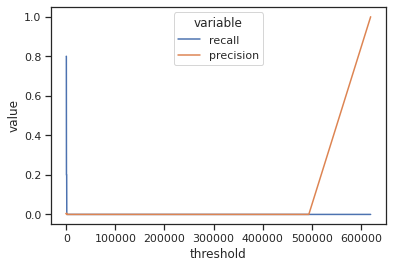

In [ ]:
val_preds = lstm.predict(reshaped_val)
val_mse = mse_3d(reshaped_val, val_preds)
val_error = pd.DataFrame({
    "mse": val_mse,
    "actual": y_val
})
precision, recall, threshold = precision_recall_curve(
    val_error["actual"], val_error["mse"])
val_prt = pd.DataFrame({
    "threshold": threshold,
    "recall": recall[1:],
    "precision": precision[1:]
})
val_prt_melted = pd.melt(val_prt, id_vars = ["threshold"],
                         value_vars = ["recall", "precision"])
sns.lineplot(x = "threshold", y = "value",
             hue = "variable", data = val_prt_melted)

In [ ]:
lstm.set_threshold(0.01)

In [ ]:
test_preds = lstm.predict(reshaped_test)
test_mse = mse_3d(reshaped_test, test_preds)
test_error = pd.DataFrame({"mse": test_mse,
                        "actual": y_test})

In [ ]:
test_preds = lstm.predict(reshaped_test)
test_mse = mse_3d(reshaped_test, test_preds)
test_error = pd.DataFrame({"mse": test_mse,
                        "actual": y_test})

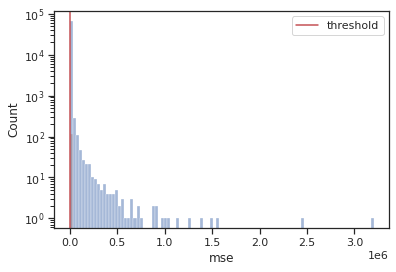

In [ ]:
g = sns.histplot(x = "mse", hue = "actual", 
                 data = test_error, bins = 100)
plt.axvline(lstm.threshold, color = "r", label = "threshold")
plt.legend(loc = "upper right")
g.set_yscale("log")
plt.show()

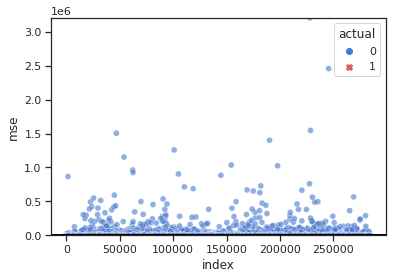

In [ ]:
g = sns.scatterplot(
        x = "index", y = "mse", 
        hue = "actual", style = "actual", 
        data = test_error.reset_index(),
        palette = {0: "#4878CF", 1: "#D65F5F"},
        alpha = 0.6)
g.set(ylim = (0, max(test_error.mse)))
g.axhline(lstm.threshold, color = "black", linewidth = 3)

In [ ]:
pred_y = lstm.predict_class(reshaped_test, test_preds)
conf_matrix = confusion_matrix(y_test, pred_y)
print("Accuracy: %.2f%%" % (100 * accuracy_score(y_test, pred_y)))
print("Precision: %.2f%%" % (100 * precision_score(y_test, pred_y)))
print("Recall: %.2f%%" % (100 * recall_score(y_test, pred_y)))

Accuracy: 0.17%
Precision: 0.17%
Recall: 100.00%


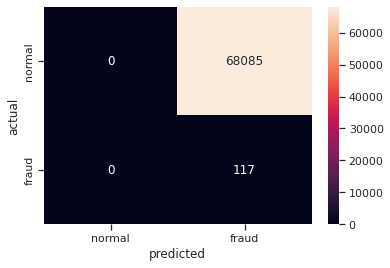

In [ ]:
sns.heatmap(conf_matrix, 
            xticklabels = ["normal", "fraud"], 
            yticklabels=["normal", "fraud"], 
            annot = True, fmt = "d")
plt.ylabel("actual")
plt.xlabel("predicted")
plt.show()

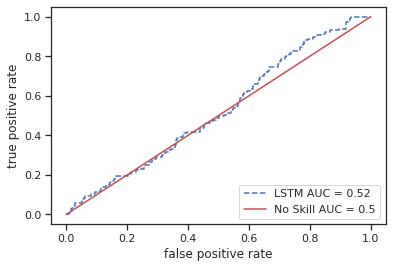

In [ ]:
fpr, tpr, _ = roc_curve(test_error["actual"], test_error["mse"])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, ls = "--", label = "LSTM AUC = %0.2f" % roc_auc)
plt.plot([0,1], [0,1], c = "r", label = "No Skill AUC = 0.5")
plt.legend(loc = "lower right")
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.show()